# Dataset


In [1]:
# Create the dataset
# Convert to list of dictionaries format for easier processing
raw_data = {
    'Loves_Popcorn': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Loves_Soda': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No'],
    'Loves_Cool_As_Ice': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No']
}

# Convert to list of dictionaries (each row is a dictionary)
data = []
for i in range(len(raw_data['Loves_Soda'])):
    row = {}
    for key in raw_data:
        row[key] = raw_data[key][i]
    data.append(row)

print("Dataset created successfully!")
print("Sample row:", data[0])

Dataset created successfully!
Sample row: {'Loves_Popcorn': 'Yes', 'Loves_Soda': 'Yes', 'Loves_Cool_As_Ice': 'No'}


# Functions for Gini and Entropy

In [2]:
import math
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx

def entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    return -sum((count/total) * math.log2(count/total) for count in counts.values())

def gini_index(labels):
    total = len(labels)
    counts = Counter(labels)
    return 1 - sum((count/total)**2 for count in counts.values())

# Splitting function


In [3]:

def split_dataset(data, feature):
    splits = {}
    for row in data:
        key = row[feature]
        if key not in splits:
            splits[key] = []
        splits[key].append(row)
    return splits

# Information gain (IG)

In [4]:
def information_gain(data, feature, criterion='entropy'):
    labels = [row["Loves_Cool_As_Ice"] for row in data]
    base_impurity = entropy(labels) if criterion == 'entropy' else gini_index(labels)
    
    splits = split_dataset(data, feature)
    total = len(data)
    weighted_impurity = 0

    for subset in splits.values():
        subset_labels = [row["Loves_Cool_As_Ice"] for row in subset]
        impurity = entropy(subset_labels) if criterion == 'entropy' else gini_index(subset_labels)
        weighted_impurity += (len(subset) / total) * impurity
    
    return base_impurity - weighted_impurity

# Build the tree


In [5]:
def build_tree(data, features, criterion='entropy'):
    labels = [row["Loves_Cool_As_Ice"] for row in data]
    
    # Base cases
    if len(set(labels)) == 1:
        return labels[0]
    if not features:
        return Counter(labels).most_common(1)[0][0]
    
    # Choose best feature
    gains = {feature: information_gain(data, feature, criterion) for feature in features}
    best_feature = max(gains, key=gains.get)
    
    tree = {best_feature: {}}
    splits = split_dataset(data, best_feature)

    remaining_features = [f for f in features if f != best_feature]

    for feature_value, subset in splits.items():
        tree[best_feature][feature_value] = build_tree(subset, remaining_features, criterion)
    
    return tree

# Running it with both criteria 

In [6]:

features = ["Loves_Popcorn", "Loves_Soda"]

print("🌿 Decision Tree using Entropy:")
entropy_tree = build_tree(data, features, criterion='entropy')
print(entropy_tree)

print("\n🌱 Decision Tree using Gini Index:")
gini_tree = build_tree(data, features, criterion='gini')
print(gini_tree)

🌿 Decision Tree using Entropy:
{'Loves_Soda': {'Yes': {'Loves_Popcorn': {'Yes': 'No', 'No': 'Yes'}}, 'No': 'No'}}

🌱 Decision Tree using Gini Index:
{'Loves_Soda': {'Yes': {'Loves_Popcorn': {'Yes': 'No', 'No': 'Yes'}}, 'No': 'No'}}


# Draw tree function


In [7]:
def draw_tree(tree, graph=None, pos=None, parent=None, label='', x=0, y=0, dx=1.5, level=1):
    if graph is None:
        graph = nx.DiGraph()
        pos = {}

    node = list(tree.keys())[0] if isinstance(tree, dict) else str(tree)
    node_label = f"{node}" if not label else f"{node}\n({label})"
    pos[node_label] = (x, y)

    if parent:
        graph.add_edge(parent, node_label)

    if isinstance(tree, dict):
        children = tree[node]
        offset = -dx * (len(children) - 1) / 2
        for i, (child_val, subtree) in enumerate(children.items()):
            draw_tree(subtree, graph, pos, node_label, child_val, x + offset + i * dx, y - 1, dx / 1.5, level + 1)

    return graph, pos

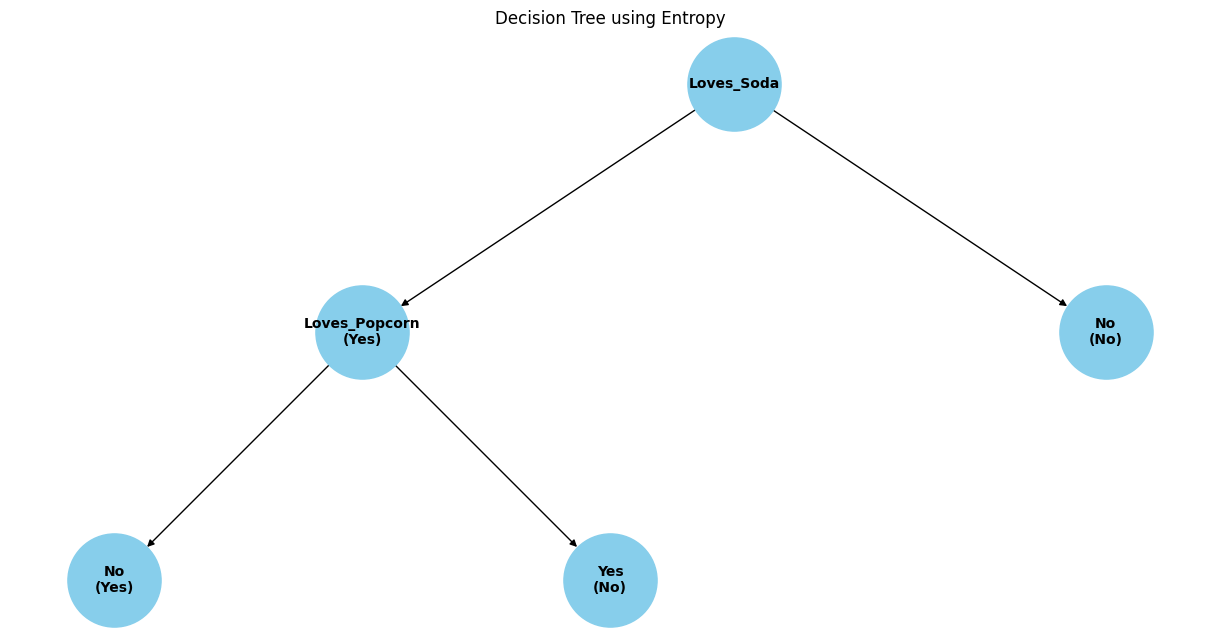

In [8]:
graph, pos = draw_tree(entropy_tree)
plt.figure(figsize=(12, 6))
nx.draw(graph, pos, with_labels=True, node_size=4500, node_color='skyblue', font_size=10, font_weight='bold')
plt.title("Decision Tree using Entropy")
plt.show()

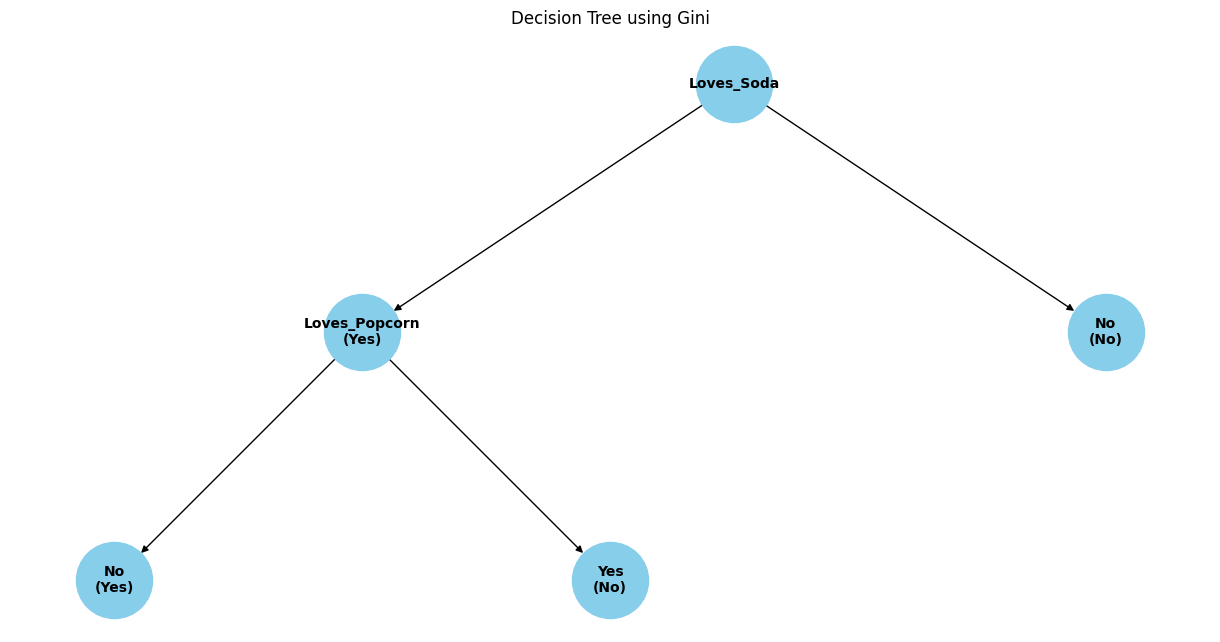

In [9]:
graph, pos = draw_tree(gini_tree)
plt.figure(figsize=(12, 6))
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
plt.title("Decision Tree using Gini")
plt.show()